# Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1.1

In [2]:
df_train = pd.read_csv('gene_expression_training.csv')

In [3]:
df_train.head()

,DYRK1A,ITSN1,BDNF,NR1,NR2A,pAKT,pBRAF,pCAMKII,pCREB,pELK,...,pCASP9,PSD95,SNCA,Ubiquitin,pGSK3B_Tyr216,SHH,pS6,SYP,CaNA,class_label
0,0.4254,0.5871,0.2420,1.7409,2.4890,0.1731,0.1590,1.7871,0.1676,1.1867,...,1.1638,1.6960,0.1715,1.0697,0.7593,0.2197,0.0952,0.3060,1.0708,1.0
1,0.2697,0.4081,0.3172,2.1387,3.0450,0.3144,0.2250,5.3216,0.2259,1.3475,...,1.9258,2.5977,0.2189,1.4788,0.8603,0.2476,0.1218,0.4842,1.0493,0.0
2,0.4379,0.7053,0.4180,2.7968,5.4608,0.2799,0.1908,6.4558,0.2835,1.4171,...,1.7261,2.3924,0.1674,1.5111,0.9010,0.2419,0.1490,0.4751,1.1946,1.0
3,0.3113,0.5176,0.3301,2.2512,3.0812,0.2979,0.2381,2.5866,0.2461,1.4128,...,1.7638,2.4122,0.1973,1.3000,1.0035,0.3391,0.1375,0.4749,1.3008,0.0
4,0.2997,0.4240,0.3096,2.2227,3.2197,0.2581,0.1909,3.2381,0.1835,1.2805,...,1.4972,2.0995,0.1987,1.2607,0.7635,0.2587,0.1304,0.3656,0.9937,0.0


In [4]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [5]:
x_train, y_train = df_train.iloc[:,:-1], df_train.iloc[:,-1]
model.fit(x_train, y_train);

## 1.2

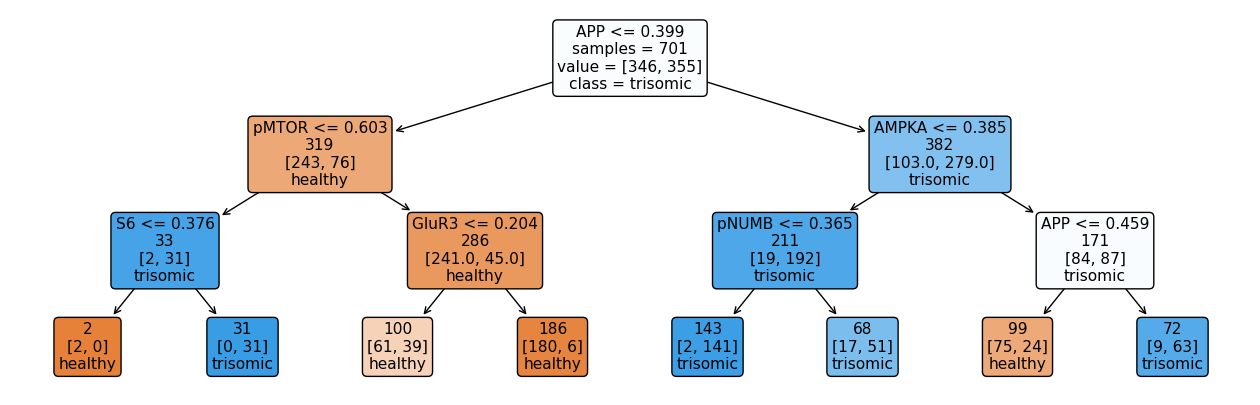

In [6]:
plt.figure(figsize=(16,5))
plot_tree(model, feature_names=x_train.columns, class_names=['healthy', 'trisomic'],
          impurity=False, filled=True, rounded=True, label='root');

## 1.3

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
df_test = pd.read_csv('gene_expression_test.csv')

x_test, y_test = df_test.iloc[:,:-1], df_test.iloc[:,-1]

In [9]:
accuracy_score(model.predict(x_test), y_test)

0.869942196531792

## 1.4

Genes expressed differently in healthy and trisomic mice (based on above decision tree):
 - `APP`
 - `pMTOR`
 - `AMPKA`
 - `S6`
 - `GluR3`
 - `pNUMB`

Searching for `trisomy <NAME_OF_GENE>` on [Google Scholar](https://scholar.google.com/) yields different number of found papers: 
 - `APP`: 27.000
 - `pMTOR`: 197
 - `AMPKA`: 21
 - `S6`: 6.880
 - `GluR3`: 102
 - `pNUMB`: 959

The maxinum number of papers (27,000) are by fare found by the search query `trisomy APP`, which indicates that this might be the a super relevant indicator.

# Task 2 

## 2.1

In [10]:
print('[max_depth=3] train accuracy:', accuracy_score(model.predict(x_train), y_train))
print('[max_depth=3] test accuracy: ', accuracy_score(model.predict(x_test), y_test))

[max_depth=3] train accuracy: 0.8616262482168331
[max_depth=3] test accuracy:  0.869942196531792


## 2.2

In [11]:
model_d5 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_d10 = DecisionTreeClassifier(criterion='entropy', max_depth=10)

model_d5.fit(x_train, y_train)
model_d10.fit(x_train, y_train);

In [12]:
print('[max_depth=5] train accuracy:', accuracy_score(model_d5.predict(x_train), y_train))
print('[max_depth=5] test accuracy: ', accuracy_score(model_d5.predict(x_test), y_test))

[max_depth=5] train accuracy: 0.9386590584878745
[max_depth=5] test accuracy:  0.884393063583815


In [13]:
print('[max_depth=10] train accuracy:', accuracy_score(model_d10.predict(x_train), y_train))
print('[max_depth=10] test accuracy: ', accuracy_score(model_d10.predict(x_test), y_test))

[max_depth=10] train accuracy: 1.0
[max_depth=10] test accuracy:  0.9132947976878613


## 2.3

Looking at `max_depth={3,5,10}` does not show overfitting as stated in the task. However the train and test accuracy diverging is a strong sign of overfitting.

Looking at e.g. `max_depth=9` we can see that it's test accuracy is higher than for `max_depth=9` but as the train accuracy is the same (`1`) and thus is not strictly smaller so the definition for overfitting given in the task description still does not apply.

In [14]:
model_d9 = DecisionTreeClassifier(criterion='entropy', max_depth=9)
model_d9.fit(x_train, y_train)
print('[max_depth=9] train accuracy:', accuracy_score(model_d9.predict(x_train), y_train))
print('[max_depth=9] test accuracy: ', accuracy_score(model_d9.predict(x_test), y_test))

[max_depth=9] train accuracy: 1.0
[max_depth=9] test accuracy:  0.9132947976878613


# Task 3

## 3.1

In [15]:
x_train_n10 = x_train + np.random.normal(0, .10, x_train.shape)
x_train_n25 = x_train + np.random.normal(0, .25, x_train.shape)

## 3.2

In [16]:
model_nx10 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_nx25 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

model_nx10.fit(x_train_n10, y_train)
model_nx25.fit(x_train_n25, y_train);

## 3.3

In [17]:
print('[σ=0.00] test accuracy: ', accuracy_score(model.predict(x_test), y_test))
print('[σ=0.10] test accuracy: ', accuracy_score(model_nx10.predict(x_test), y_test))
print('[σ=0.25] test accuracy: ', accuracy_score(model_nx25.predict(x_test), y_test))

[σ=0.00] test accuracy:  0.869942196531792
[σ=0.10] test accuracy:  0.7283236994219653
[σ=0.25] test accuracy:  0.7254335260115607


# Task 4

## 4.1

In [18]:
y_train_n10 = np.where(np.random.random(y_train.shape) <= .10, 1 - y_train, y_train)
y_train_n25 = np.where(np.random.random(y_train.shape) <= .25, 1 - y_train, y_train)

## 4.2

In [19]:
model_ny10 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_ny25 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

model_ny10.fit(x_train, y_train_n10)
model_ny25.fit(x_train, y_train_n25);

## 4.3

In [20]:
print('[p=0.00] test accuracy: ', accuracy_score(model.predict(x_test), y_test))
print('[p=0.10] test accuracy: ', accuracy_score(model_ny10.predict(x_test), y_test))
print('[p=0.25] test accuracy: ', accuracy_score(model_ny25.predict(x_test), y_test))

[p=0.00] test accuracy:  0.869942196531792
[p=0.10] test accuracy:  0.8526011560693642
[p=0.25] test accuracy:  0.7745664739884393


# Task 5

In [21]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 5.1

In [22]:
df = pd.read_csv('gene_expression_with_missing_values.csv')

## 5.2

In [23]:
df_rand = df.where(df.notna(), np.random.uniform(0, 1, df.shape))
df_mean = df.fillna(df.mean())
df_median = df.fillna(df.median())

## 5.3

In [24]:
def plot_decision_tree(df, title):
    x, y = df.iloc[:,:-1], df.iloc[:,-1]
    model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    model.fit(x, y)

    plt.figure(figsize=(12, 4.5))
    plot_tree(model, feature_names=x.columns, class_names=['healthy', 'trisomic'],
              impurity=True, filled=True, rounded=True, label='root')
    plt.title(title)
    plt.show()

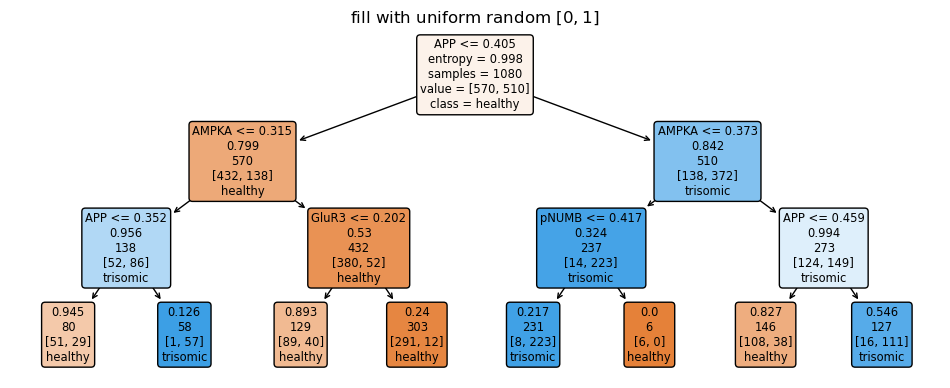

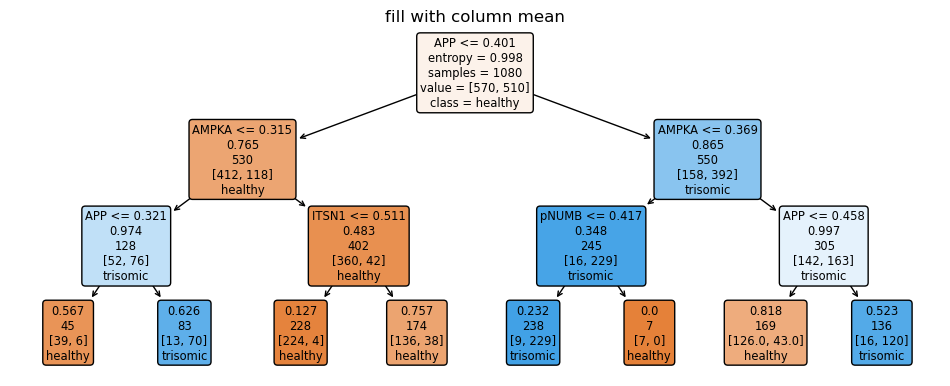

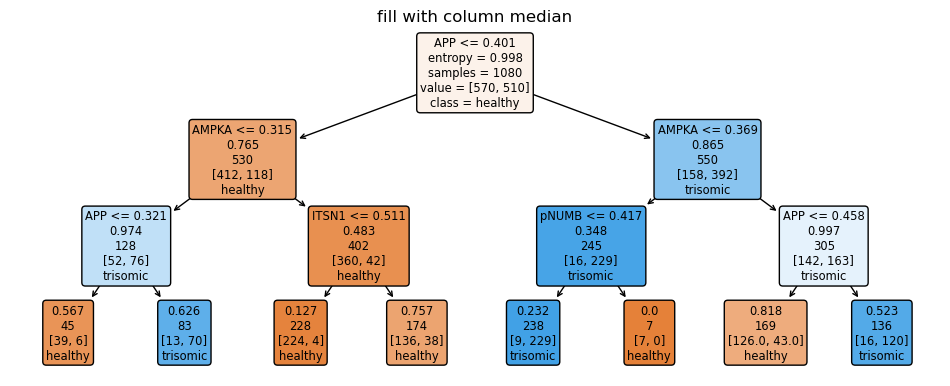

In [25]:
plot_decision_tree(df_rand, 'fill with uniform random $[0, 1]$')
plot_decision_tree(df_mean, 'fill with column mean')
plot_decision_tree(df_median, 'fill with column median')

The decision trees produced by filling with column mean vs. column median are identical. The decision tree produced by filling with random uniform number between $[0, 1]$ seems to create ever so slightly less pure classes (i.e. the weighted sum of the impurity is higher) but one would need to verify that with a correct metric.

All of these decision trees consider `APP` to be the most important genome but the cut-off point is marginally different ($0.399$ previously to $0.405$ and $0.401$).